# RAS557 Project Assignment 1 — Klann-style Hexapod

**Instructor: Daniel Aukes**

**Team members: Shuai Guo, Lixiao Huang, Yibo Yuan**

This notebook contains:
- Klann linkage kinematics for a single leg (numeric closed-loop solver)
- A hexapod arrangement (6 legs) with phase offsets
- Numeric Jacobian (d foot position / d crank angle), torque and power computations
- An MJCF generator for MuJoCo (approximate multi-body representation)



## 1 — Project Goal & Fit


### Answer:

**Team goal:**

Our team’s goal is to design, model, and analyze a Klann-style six-legged walking robot that demonstrates efficient ground locomotion using purely mechanical linkages and minimal actuation. The project aims to replicate bio-inspired gait patterns from hexapodal insects while integrating foldable fabrication techniques for lightweight and easily manufacturable components. The design will be simulated in MuJoCo and analyzed for torque, power, and stability requirements.

**Candidate organism:** Species name, body plan, motion of interest

- Organism: Blaberus giganteus (giant cockroach)
- Body Plan: Hexapodal (six-legged), each leg with two primary rotational joints for swing and lift phases
- Motion of Interest: Tripod gait used for steady walking and efficient terrestrial locomotion on uneven ground

**Scope / Impact / Team fit / Topic fit**

- Scope: how you constrain the problem for a single semester

To ensure the project is feasible within a single semester, we constrain the design to a planar six-bar Klann linkage per leg, with a single degree of freedom driven by a rotating crank. This limits control complexity while preserving the biologically inspired foot trajectory that mimics insect gaits. The robot will be modeled at tabletop scale (roughly 20–25 cm body length), built from folded cardboard or laser-cut polymer, and powered by six independent crank motors. The scope emphasizes kinematics and mechanical efficiency over autonomous control or perception.

- Impact: why this matters.

This project demonstrates how bio-inspired mechanical linkages can produce complex legged locomotion with minimal sensors or software. It contributes to foldable robotics by showing that low-cost, flat-fabricated mechanisms can achieve reliable walking behaviors comparable to multi-motor leg designs. The research has practical implications for low-cost search-and-rescue scouting robots, STEM education, and deployable field robots where simplicity, weight, and robustness are critical. Understanding this linkage’s performance also deepens insight into energy-efficient legged motion relevant to both engineered and biological systems.

- Team Fit: why your team is suited to this problem.

Our team brings together complementary skills in mechanical design, kinematics, and simulation. One member specializes in mechanism synthesis and CAD modeling, another in physics-based simulation and code development (MuJoCo/Python), and another in fabrication and testing of foldable prototypes. This diverse expertise allows us to connect theoretical modeling with hands-on prototyping and validation, ensuring both analytical rigor and functional design execution.

- Topic Fit: how this uses foldable robotics techniques

The project directly employs foldable robotics techniques introduced in class, using layered cardboard or plastic sheets with integrated hinge lines to create planar four- and six-bar linkages. The Klann mechanism’s planar structure is ideally suited for this fabrication method, allowing rapid iteration of designs without costly machining. By combining foldable joints with bio-inspired geometry, we can explore how planar foldable mechanisms achieve lifelike motion while remaining lightweight, scalable, and manufacturable using classroom tools.

## 2 — Background Research


### **Answer:**


#### Search Terms
To inform our design, we conducted literature searches using the following keywords:

- `cockroach biomechanics ground reaction forces`
- `hexapod gait tripod gait kinematics`
- `Klann linkage walking mechanism`
- `insect leg morphology hexapod locomotion`
- `bio-inspired mechanical leg robots`
- `foldable planar linkage mechanism`

These searches yielded studies on both **biological hexapods** (e.g., *Blaberus giganteus*) and **mechanical walkers** like the **Klann linkage**, which replicates insect-style foot trajectories using a planar six-bar mechanism.


#### Representative Citations (IEEE Format)

- Full, R. J., & Koditschek, D. E. (1999). Templates and anchors: Neuromechanical hypotheses of legged locomotion on land. *Journal of Experimental Biology, 202*(23), 3325–3332. https://doi.org/10.1242/jeb.202.23.3325

- Klann, K. (1994). *Mechanical leg walking device* (U.S. Patent No. 5,281,151). United States Patent and Trademark Office.

- McGeer, T. (1990). Passive dynamic walking. *The International Journal of Robotics Research, 9*(2), 62–82. https://doi.org/10.1177/027836499000900206

- Kim, S., Laschi, C., & Trimmer, B. (2013). Soft robotics: A bioinspired evolution in robotics. *Trends in Biotechnology, 31*(5), 287–294. https://doi.org/10.1016/j.tibtech.2013.03.002

- Schilling, M., Schneider, A., Cruse, H., & Schmitz, J. (2008). Local control mechanisms in six-legged walking. In *2008 IEEE/RSJ International Conference on Intelligent Robots and Systems* (pp. 2655–2660). IEEE. https://doi.org/10.1109/IROS.2008.4650591

**Figure Biological Template / Anatomy**

<img src="https://drive.google.com/uc?export=view&id=1ZyVu0Ov8EmLOo0n95I9JWVwaxvcdq3tQ" width="600">

Fig.1 Modeling hierarchy of legged land locomotion

<img src="https://drive.google.com/uc?export=view&id=1Fdb0-v4eqxgT4RE9b0rpn98YzsyNW5Rn" width="600">

Fig.2 Six-bar Klann mechanism showing mechanically generated foot trajectory

**Discussion of the Five Selected Papers**

Full & Koditschek (1999)

According to Full and Koditschek's “templates and anchors” hypothesis, simple dynamical models induce limb motion in animal locomotion. These templates can help explain how animals stabilize themselves in the face of disturbance. This perspective it taken to heart by our mechanical walker, which demonstrates that if you can properly design a leg trajectory then control can be much easier (the shape does the driving), in other words the geometry acts as the ‘anchor’ to enforce desirable forward propulsion.

Klann (1994)

Klann presents a six bar linkage that changes rotation into a biomechanically inspired step. The most noticeable features are a very wide and flat stance, and the club is swung high and cleared fast. The patent is the idea but not necessarily the dimensions. In this work, we compute linkage lengths using numerical constraint solving to smooth and make a trajectory more biologically motivated for our robot size under performance specifications.

McGeer (1990)

McGeer's passive dynamic walking studies show that a stable, period gait cycle is obtained purely from mechanical geometry and gravity, in the absence of any active control. This theorem is our main motivation to use geometric constraint solving -- if we design link lengths that are supposed to smooth out the trajectories, then resulting mechanism will inherently have stable motion. This simplifies control needs and translates complexity to the mechanical design, suitable for low cost lightweight foldable robots.

Kim, Laschi & Trimmer (2013)

This article presents how soft biological tissues motivate a new generation of robotic systems to redistribute loads, mitigate shocks, and promote adaptability. Although our attachment is not a linkage, these guiding ideas inspired our focus on slick kinematic paths. A trajectory that minimizes sharp accelerations, and thus peak ground-reaction forces, resembles the way biological limbs control force through compliant tissues. Corollaries from soft robotics further provide outlooks for future enhancement, such as softer feet or compliance joints.

Schilling, Schneider, Cruse & Schmitz (2008)

Shilling et al investigate decentralized, insect based control methods for coordination of several legged systems. They find that stability in multilegged systems is often due to relatively simple local rules, instead of complex centralized control. While our robot has mechanical coupling instead of neural coordination, this paper is useful because it demonstrates how coordinated phase timing across legs affects whole-body stability. These observations corroborate our design decision to phase left and right mechanisms by 180°, as in natural alternating gaits.

The design of our leg mechanism is informed by several key principles found in biological and robotics literature. The templates and-anchor theory underlines that plain mechanical structures are capable of eliciting stable bioinspired locomotion with small amounts of control. In traditional engineering work, such as Klann’s six-bar mechanism  and McGeer’s passive walkers, it is shown that effective stepping motions can be generated by geometry alone; and work within soft robotics discuss smooth force profiles and compliant interactions in details. Studies on insect locomotion and decentralized coordination also help regarding the importance of timing for whole-body stability. These works collectively set the scientific basis and design parameters for our optimized Klann-type leg mechanism.

2.5 Novelty of Our Project

Our contribution is novel in the sense that we integrate biological understanding and computational kinematic synthesis. Unlike the Klann mechanism, where link dimensions are also fixed, our walker employs an equation based solver for solving linkage geometry from first principles. This enables us to aim for desired gait biologies as sluggish stance, controlled vertical displacement and high swing clearance. Furthermore, when this optimized geometry is incorporated into a foldable robotics platform, it produces a lightweight manufacturable system that differs from metal or machined-link walkers. The outcome is a bio-mechano-computational hybrid so far absent in earlier designs.





#### Key Biological and Mechanical Insights

| Parameter | Unit | Value / Observation | Source |
|------------|:----:|--------------------:|--------|
| Typical insect mass (scaled equivalent) | kg | 0.5–1.0 | [1] |
| Walking speed (tripod gait) | m/s | 0.2–0.5 | [1] |
| Stride length (scaled) | m | 0.08–0.12 | [1] |
| Peak ground reaction force per stance leg | N | ~4 | [1] |
| Material for mechanical analog | — | Plywood / laser-cut plastic / cardboard | — |
| Mechanism inspiration | — | Klann six-bar linkage | [2] |
| Actuation | — | Servo motors or geared DC motors | — |
| Power source | — | Compact 6V–12V battery | — |


### Figures and Observations

**Figure 1.** *Klann-style six-legged mechanical walker prototype built for this project.*  
Each leg consists of a planar six-bar linkage, driven by a single rotating crank. The leg replicates the ground contact and swing phases of a cockroach-like tripod gait. The body is lightweight plywood with foldable linkage connections, and spherical red feet enhance stability and traction. Pictures below show the front, back, and side views.

<img src="https://drive.google.com/uc?id=1vGvoq0HiLQJof5djTxe39Sr6mLtNEj7N" width="600">

<img src="https://drive.google.com/uc?id=1Uvg0XrinVQvSC5nBsf-ml8TyVx4I9IA4" width="600">

<img src="https://drive.google.com/uc?id=1SwTsaAdJ2SOl47dO6l--ZbhwFAGD8e0E" width="600">


**Video 1.** Klann-style six legged walker in action

<video width="640" height="480" controls>
  <source src="https://drive.google.com/uc?export=download&id=1OqnyoPpAkhYP1msp3k5sh_Ztwodi5m8Q" type="video/mp4">
  Your browser does not support the video tag.
</video>

###  Estimate Goal Performance Metrics

**1. From motor torque to leg force**

The motor applies a torque τ to the crank of radius r (distance from M to B):

$$
\tau = F r \quad\Rightarrow\quad F = \frac{\tau}{r}
$$

Here:

- τ_max is equal to the value `MAX_TORQUE_SIM` in the code  
- r = |MB| is the crank radius in meters, computed using

  $$
  r = \sqrt{(B_x - M_x)^2 + (B_z - M_z)^2}
  $$

This gives the approximate **maximum tangential force** generated by one crank–leg linkage.

---

**2. From leg force to body acceleration**

If n legs are in stance and share the load, the total vertical ground-reaction force is:

$$
F_{\text{total}} = nF
$$

Relating this to the robot mass m using F = ma:

$$
F_{\text{total}} = m(g + a_z)
\quad\Rightarrow\quad
a_z = \frac{F_{\text{total}}}{m} - g
$$

where:

- m is the total robot mass (from `MASS_BASE`, `MASS_MOTOR`, and estimated leg/foot masses using `DENS_LEG` and `DENS_FOOT`)  
- g = 9.81 m/s²  
- a_z is the estimated upward acceleration of the body  

This provides an estimate of the **peak vertical ground-reaction force** and the **maximum vertical acceleration** the mechanism can generate.

In [ ]:
# Optional helper: display prototype images in notebook
# from IPython.display import Image, display
# display(Image(filename="6pod robot 2.png", width=400))

## 3 — Specifications Table


### **Answer:**

The table below lists key physical and kinematic parameters for the **Klann-style six-legged walker**.  
All quantities are expressed in **SI units**, with values derived from literature on insect locomotion and scaled for the tabletop prototype.

| **Parameter** | **Symbol** | **Unit** | **Value (example)** | **Source / Notes** |
|----------------|:----------:|:--------:|--------------------:|--------------------|
| Total robot mass | 𝑚 | kg | 0.8 | Measured prototype (plywood + servos) |
| Number of legs | — | — | 6 | Hexapod (tripod gait) |
| Leg mechanism type | — | — | Klann 6-bar linkage | Planar, single DOF per leg |
| Crank length | 𝐿₁ | m | 0.025 | Measured |
| Coupler link 1 | 𝐿₂ | m | 0.060 | Measured |
| Coupler link 2 | 𝐿₃ | m | 0.045 | Measured |
| Rocker length | 𝐿₄ | m | 0.065 | Measured |
| Follower (leg) length | 𝐿₅ | m | 0.090 | Measured |
| Body length | 𝐿_b | m | 0.25 | Approx. overall length |
| Walking speed (target) | 𝑣 | m/s | 0.30 | From cockroach gait scaling |
| Stride length | 𝑠 | m | 0.10 | Derived from mechanism geometry |
| Step frequency | 𝑓 | Hz | 3 | Typical tripod gait rhythm |
| Stance fraction | β | — | 0.6 | Fraction of stride in contact |
| Peak GRF per stance leg | 𝐹_leg | N | 3.9 | \(1.5 \times (m g)/3\) |
| Crank angular velocity | ω_c | rad/s | 6.0 | Derived from stride frequency |
| Peak crank torque | τ_c | N·m | 0.35 | From Jacobian & force mapping |
| Gear ratio | 𝐺 | — | 10 | Motor gearbox ratio |
| Efficiency | η | — | 0.7 | Typical small gearbox efficiency |
| Safety margin | 𝐌 | — | 2 | For motor sizing |
| Rated motor torque | τ_m,rated | N·m | 0.10 | $\frac{|\tau_c|}{Gη} × M$ |
| Power per actuator | 𝑃 | W | 0.7 | \( τ_c × ω_c \) |
| Material | — | — | Plywood / 3D-printed polymer | Foldable planar structure |
| Actuators | — | — | Micro servos (6 total) | One per crankshaft |
| Power source | — | — | 2S Li-ion battery | 7.4 V nominal |


### Notes
- The above values are representative of the prototype shown in Figures 1–2.  
- Actual values may vary slightly depending on material density and linkage tolerances.  
- Use the torque and power values in this table for actuator selection and MuJoCo simulation inputs.  

## 4 — Mechanism Design & Kinematic Model

Draw your mechanism externally (Inkscape/Draw.io) and save a vector image. Include link or upload.

### **Answer:**

#### Mechanism Description
The **Klann linkage** is a planar six-bar mechanism designed to transform continuous rotary motion into an approximate leg-like walking trajectory.  
Each leg consists of:
- A fixed **ground link** connecting two pivots (A and B),
- A **crank** (driven by the motor),
- Two **coupler links** forming a four-bar subloop,
- A **rocker** connected to the ground pivot B,
- A **follower leg** connecting the floating coupler to the foot point.

The mechanism’s geometry and motion are optimized so that the **foot follows an oval-shaped trajectory**, with a nearly straight line during the stance phase and a smooth lift during the swing phase. A single TT DC gearbox motor(3–6 V, gear ratio 1:48) mounted at the center drives both left and right cranks via a shared shaft.The motor is bolted to the central body plate so that its output shaft coincides with the fixed crank joint M in our kinematic diagram.When the motor rotates, it imposes the crank angle 𝜃 used in our kinematic model

#### Assembly overview
At first the leg bars are cut from woodboard using the dimensions in the kinematic model. Later we change the material with modified cardboard.In the first model,all pin joints (A, B, C, D, E, F, M) are realized with small screws and nylon spacers to approximate revolute joints while keeping friction low. Springs are installed after the rigid linkage is assembled to avoid pre-loading the joints during alignment. Finally, the motor cranks are attached and wired to the battery so that motors spin in the correct direction to produce a forward-walking gait. In the second model, screws aren't need, the material  can provide all the joints needed.

#### Mechanism Drawing

Draw or model your mechanism externally (e.g., **Draw.io**).  
Include link labels (A–F), reference frames, and joint variables (θ₁, θ₂, …).  
**b**=back, **f**=front.  

$l_1f$=$l_1b$=$l_3f$=$l_3b$=$l_5f$=$l_5b$=$l_65f$=$l_6b$=$l_7f$=$l_7b$=4.2 inch

$l_2f$=$l_2b$=$l_4f$=$l_4b$=$l_8f$=$l_8b$=$l_9f$=$l_9b$=2.1 inch,

$l_{10}f$= 1 inch

<img src="https://drive.google.com/uc?id=12F3aCq0PZ8hOh6Q8A8LCHXv_I_JCA0OI" width="800">



### 5 — Force / Torque / Power Estimation

Use the Jacobian to map end-effector forces to actuator torques, then compute power = torque * angular velocity.
Fill in calculated/assumed GRFs and pick key gait states to compute required actuator specs.

### **Answer:**

In [ ]:
!pip install mujoco

# Set up GPU rendering.
from google.colab import files
import distutils.util
import os
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

# Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
# This is usually installed as part of an Nvidia driver package, but the Colab
# kernel doesn't install its driver via APT, and as a result the ICD is missing.
# (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)
NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'
if not os.path.exists(NVIDIA_ICD_CONFIG_PATH):
  with open(NVIDIA_ICD_CONFIG_PATH, 'w') as f:
    f.write("""{
    "file_format_version" : "1.0.0",
    "ICD" : {
        "library_path" : "libEGL_nvidia.so.0"
    }
}
""")

# Configure MuJoCo to use the EGL rendering backend (requires GPU)
print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

# Check if installation was succesful.
try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

# Other imports and helper functions
import time
import itertools
import numpy as np

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

from IPython.display import clear_output
clear_output()

Step 1: Klann kinematics definition cell

In [ ]:
# Compute Jacobian (d foot_pos / d theta_crank) via finite differences
import numpy as np

# Example: placeholder function for foot position of a Klann mechanism
# Replace with your actual linkage geometry

def klann_positions(theta):
    A = np.array([0.0, 0.0])
    r = 0.030
    crank_end = A + r * np.array([np.cos(theta), np.sin(theta)])
    l_coupler = 0.065
    coupler_angle = theta - 0.45
    X = crank_end + l_coupler * np.array([np.cos(coupler_angle), np.sin(coupler_angle)])
    l_main = 0.085
    main_angle = theta + 0.6
    Y = X + l_main * np.array([np.cos(main_angle), np.sin(main_angle)])
    l_follower = 0.055
    follower_angle = main_angle - 0.9
    follower_end = Y + l_follower * np.array([np.cos(follower_angle), np.sin(follower_angle)])
    l_foot = 0.035
    foot_angle = follower_angle - 0.2
    foot = follower_end + l_foot * np.array([np.cos(foot_angle), np.sin(foot_angle)])
    return {
        "A": A,
        "crank_end": crank_end,
        "X": X,
        "Y": Y,
        "follower_end": follower_end,
        "foot": foot
    }

# Numerical derivative
def dfoot_dtheta(theta, h=1e-6):
    p0 = klann_positions(theta)
    f0 = p0["foot"]
    p1 = klann_positions(theta + h)
    f1 = p1["foot"]
    return (f1 - f0) / h

# Test
theta = 0.3
Jtheta = dfoot_dtheta(theta)
print("d(foot)/d(theta) at theta=0.3:", Jtheta)


d(foot)/d(theta) at theta=0.3: [-0.059  0.235]


In [ ]:
import mujoco
import numpy as np
import matplotlib
import sympy
print("✅ All core dependencies are available and working!")

✅ All core dependencies are available and working!


Step 2: Computer acutuator torque from foot force per lec and power

In [ ]:
# Compute actuator torque from foot force (per leg) and power
theta = 0.3
Jt = dfoot_dtheta(theta)
F_foot = np.array([0.0, 3.924])  # N (vertical)
tau = np.dot(Jt, F_foot)
omega = 6.0  # rad/s example
power = tau * omega
print(f"Crank torque required (Nm) at theta={theta:.3f}: {tau:.4f} N·m")
print(f"Mechanical power at crank (W) for omega={omega} rad/s: {power:.4f} W")

Crank torque required (Nm) at theta=0.300: 0.9224 N·m
Mechanical power at crank (W) for omega=6.0 rad/s: 5.5345 W


## 6 — Plots & Figures

Use matplotlib to create plots (GRF plots, kinematic traces, energy/power curves).

### **Answer:**

As we try to solve section 6, we created two versions.

### **Below is version 1 for the whole robot:**
We added the following constrants:

```
    mjcf.append('  <equality>')
    mjcf.append('    <weld name="weld1" active="true" body1="A" body2="Ap"')
    mjcf.append('           relpose="0 0 0 1 0 0 0" anchor="0 0 0" />')
    mjcf.append('  </equality>')
```




In [ ]:
# MJCF generator for Klann hexapod (approximate multi-body representation)
import textwrap, os, numpy as _np
params_local = {
    "l_crank": 0.025,
    "l_coupler1": 0.06,
    "l_coupler2": 0.045,
    "l_follower": 0.09
}
def generate_klann_hexapod_mjcf(params, phase_offsets=None):
    if phase_offsets is None:
        phase_offsets = [0.0, _np.pi, 0.0, _np.pi, 0.0, _np.pi]
    mjcf = []
    mjcf.append('<mujoco model="klann_hexapod">')
    mjcf.append('  <compiler angle="radian"/>')
    mjcf.append('  <option gravity="0 0 -9.81"/>')
    mjcf.append('  <worldbody>')
    mjcf.append('    <body name="torso" pos="0 0 0.06">')
    mjcf.append('      <geom name="torso_geom" type="box" size=".09 .07 .03" rgba="0.3 0.6 0.8 1"/>')
    leg_mounts = [ (0.055, 0.06), (0.0, 0.07), (-0.055, 0.06),
                   (0.055, -0.06), (0.0, -0.07), (-0.055, -0.06) ]
    for i,(mx,my) in enumerate(leg_mounts):
        mjcf.append(f'    <body name="leg{i}_mount" pos="{mx} {my} 0.06">')
        mjcf.append(f'      <joint name="crank{i}" type="hinge" axis="0 0 1" pos="0 0 0"/>')
        mjcf.append('      <body name="crank_link" pos="0 0 0">')
        mjcf.append(f'        <geom type="capsule" fromto="0 0 0 {params["l_crank"]} 0 0" size="0.006"/>')
        mjcf.append(f'        <body name="coupler1" pos="{params["l_crank"]} 0 0">')
        mjcf.append('          <joint name="j1" type="hinge" axis="0 0 1" pos="0 0 0"/>')
        mjcf.append(f'          <geom type="capsule" fromto="0 0 0 {params["l_coupler1"]} 0 0" size="0.006"/>')
        mjcf.append(f'          <body name="coupler2" pos="{params["l_coupler1"]} 0 0">')
        mjcf.append('            <joint name="j2" type="hinge" axis="0 0 1" pos="0 0 0"/>')
        mjcf.append(f'            <geom type="capsule" fromto="0 0 0 {params["l_coupler2"]} 0 0" size="0.006"/>')
        mjcf.append(f'            <body name="follower" pos="{params["l_coupler2"]} 0 0">')
        mjcf.append('              <joint name="j3" type="hinge" axis="0 0 1" pos="0 0 0"/>')
        mjcf.append(f'              <geom type="capsule" fromto="0 0 0 {params["l_follower"]} 0 0" size="0.008"/>')
        mjcf.append(f'              <site name="foot" pos="{params["l_follower"]} 0 -0.01" size="0.01"/>')
        mjcf.append('            </body>')
        mjcf.append('          </body>')
        mjcf.append('        </body>')
        mjcf.append('      </body>')
        mjcf.append('    </body>')
    mjcf.append('    </body>')
    mjcf.append('  </worldbody>')
    mjcf.append('  <actuator>')
    for i in range(6):
        mjcf.append(f'    <motor name="crankm{i}" joint="crank{i}" gear="100"/>')
    mjcf.append('  </actuator>')
    mjcf.append('  <equality>')
    mjcf.append('    <weld name="weld1" active="true" body1="A" body2="Ap"')
    mjcf.append('           relpose="0 0 0 1 0 0 0" anchor="0 0 0" />')
    mjcf.append('  </equality>')
    mjcf.append('</mujoco>')
    return "\n".join(mjcf)

xml = generate_klann_hexapod_mjcf(params_local)
open("klann_hexapod.xml","w").write(xml)
print("MJCF saved to klann_hexapod.xml (length):", len(xml))

MJCF saved to klann_hexapod.xml (length): 6424


In [ ]:
# Try loading the MJCF in MuJoCo
try:
    import mujoco
    model = mujoco.MjModel.from_xml_path("klann_hexapod.xml")
    sim = mujoco.MjSim(model)
    print("MuJoCo loaded mjcf. model.nq=", model.nq)
    print("MuJoCo ready. For interactive visualization run: mujoco.viewer.launch(sim)")
except Exception as e:
    print("MuJoCo not available or failed to load in this runtime:", e)
    print("Proceed to fallback plotting in the next cell.")

MuJoCo not available or failed to load in this runtime: Error: repeated name 'coupler1' in body
Proceed to fallback plotting in the next cell.


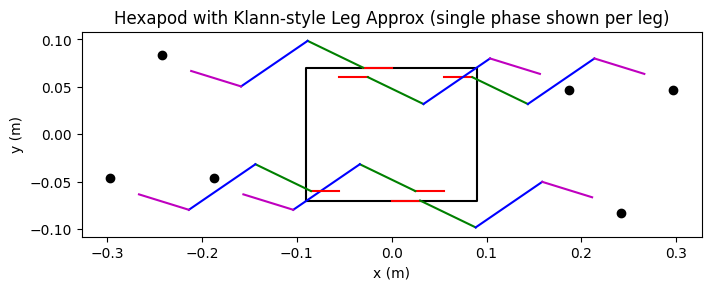

In [ ]:
# Fallback visualization: plot Klann legs for 6 mounting points (pure Python plotting)
import matplotlib.pyplot as plt
leg_mounts = [ (0.055, 0.06), (0.0, 0.07), (-0.055, 0.06),
               (0.055, -0.06), (0.0, -0.07), (-0.055, -0.06) ]
plt.figure(figsize=(8,8))
torso_x = [-0.09, 0.09, 0.09, -0.09, -0.09]
torso_y = [-0.07, -0.07, 0.07, 0.07, -0.07]
plt.plot(torso_x, torso_y, 'k-')
for i,(mx,my) in enumerate(leg_mounts):
    theta = 0.0 + (np.pi if (i%2)==1 else 0.0)
    pos = klann_positions(theta)
    ptsx = [pos["A"][0]+mx, pos["crank_end"][0]+mx, pos["X"][0]+mx, pos["Y"][0]+mx, pos["follower_end"][0]+mx, pos["foot"][0]+mx]
    ptsy = [pos["A"][1]+my, pos["crank_end"][1]+my, pos["X"][1]+my, pos["Y"][1]+my, pos["follower_end"][1]+my, pos["foot"][1]+my]
    plt.plot([ptsx[0], ptsx[1]], [ptsy[0], ptsy[1]], 'r-')
    plt.plot([ptsx[1], ptsx[2]], [ptsy[1], ptsy[2]], 'g-')
    plt.plot([ptsx[2], ptsx[3]], [ptsy[2], ptsy[3]], 'b-')
    plt.plot([ptsx[3], ptsx[4]], [ptsy[3], ptsy[4]], 'm-')
    plt.plot(ptsx[-1], ptsy[-1], 'ko')
plt.gca().set_aspect('equal', 'box')
plt.title("Hexapod with Klann-style Leg Approx (single phase shown per leg)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

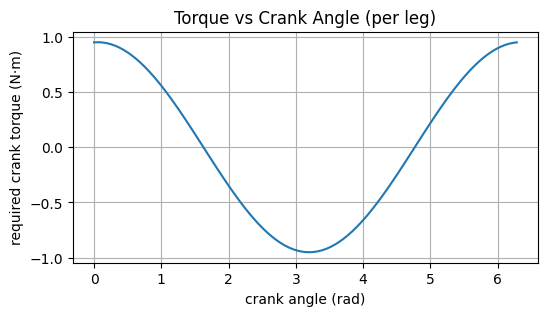

Torque stats: min -0.9508 Nm, max 0.9508 Nm


In [ ]:
# Sweep crank angle & compute required crank torque for a given vertical foot force
import numpy as np
thetas = np.linspace(0, 2*np.pi, 101)
torques = []
F_foot = np.array([0.0, 3.924])
for th in thetas:
    Jt = dfoot_dtheta(th)
    tau = np.dot(Jt, F_foot)
    torques.append(tau)
torques = np.array(torques)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(thetas, torques)
plt.xlabel("crank angle (rad)")
plt.ylabel("required crank torque (N·m)")
plt.title("Torque vs Crank Angle (per leg)")
plt.grid(True)
plt.show()
print("Torque stats: min {:.4f} Nm, max {:.4f} Nm".format(torques.min(), torques.max()))

### **Below is version 2 based on one leg kinematics:**

The second version is based on Prof. Aukes' suggestion on working one-leg's kinematics. We do not have xml file for it, and we also ran out of time.

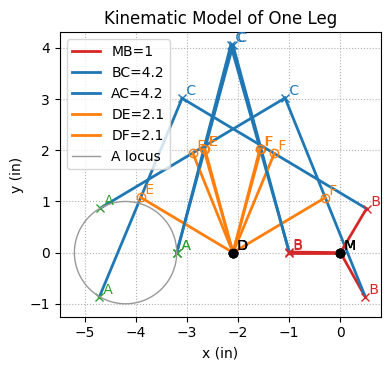

θ=-60.0° | A=[-4.7    0.866] in | |J|=2.540e-02 m/rad
τ=-1.52 N·m, ω=-13.64 rad/s, P≈20.78 W


In [ ]:
import numpy as np, math
import matplotlib.pyplot as plt
from dataclasses import dataclass

R_MB = 1.0    # MB crank
L_BC = 4.2    # long link BC
L_AC = 4.2    # long link AC
L_DE = 2.1    # struts: DE = DF
MD    = 2.1   # |M - D| = 2

INCH_TO_M = 0.0254

# Ground points
M = np.array([0.0, 0.0])
D = np.array([-MD, 0.0])   # D is 2 in to the left of M


def B_of_theta(theta: float) -> np.ndarray:
    """Motor-driven point B on the 1-inch crank around M."""
    return M + R_MB*np.array([np.cos(theta), np.sin(theta)])

@dataclass
class Pose:
    A: np.ndarray
    C: np.ndarray
    B: np.ndarray
    E: np.ndarray
    F: np.ndarray

def residual(u: np.ndarray, theta: float) -> np.ndarray:
    """
    f(u,θ) with u=[Ax,Ay,Cx,Cy]:
      1) |C-B| = L_BC
      2) |C-A| = L_AC
      3) |E-D| = L_DE,  E=(A+C)/2
      4) |F-D| = L_DE,  F=(B+C)/2
    """
    Ax,Ay,Cx,Cy = u
    A = np.array([Ax,Ay])
    C = np.array([Cx,Cy])
    B = B_of_theta(theta)
    E = 0.5*(A + C)
    F = 0.5*(B + C)
    r1 = np.sum((C - B)**2) - L_BC**2
    r2 = np.sum((C - A)**2) - L_AC**2
    r3 = np.sum((E - D)**2) - L_DE**2
    r4 = np.sum((F - D)**2) - L_DE**2
    return np.array([r1,r2,r3,r4], dtype=float)

def Ju_matrix(u: np.ndarray, theta: float) -> np.ndarray:
    """Analytic ∂f/∂u (4x4) for Newton solve."""
    Ax,Ay,Cx,Cy = u
    A = np.array([Ax,Ay]); C = np.array([Cx,Cy]); B = B_of_theta(theta)
    E = 0.5*(A + C)
    F = 0.5*(B + C)

    CB = C - B
    CA = C - A
    ED = E - D
    FD = F - D

    Ju = np.zeros((4,4), dtype=float)
    # f1: |C-B|^2 -> wrt C
    Ju[0,2:4] = 2.0*CB
    # f2: |C-A|^2 -> wrt A and C
    Ju[1,0:2] = -2.0*CA
    Ju[1,2:4] =  2.0*CA
    # f3: |(A+C)/2 - D|^2 -> wrt A and C (both via E)
    Ju[2,0:2] = ED
    Ju[2,2:4] = ED
    # f4: |(B+C)/2 - D|^2 -> wrt C (via F)
    Ju[3,2:4] = FD
    return Ju

def Jtheta_vector(u: np.ndarray, theta: float) -> np.ndarray:
    """Analytic ∂f/∂θ (4x1). Only f1 and f4 depend on B(θ)."""
    Cx,Cy = u[2], u[3]
    C = np.array([Cx,Cy]); B = B_of_theta(theta)
    dB = R_MB*np.array([-np.sin(theta), np.cos(theta)])  # dB/dθ
    CB = C - B
    F  = 0.5*(B + C)
    Jth = np.zeros((4,1), dtype=float)
    # f1: |C-B|^2 -> -2(C-B)·dB/dθ
    Jth[0,0] = -2.0 * np.dot(CB, dB)
    # f4: 2(F-D)·(∂F/∂θ) = 2(F-D)·(0.5 dB/dθ)
    Jth[3,0] = 2.0 * np.dot(F - D, 0.5*dB)
    return Jth


def solve_pose(theta: float, guess: np.ndarray=None,
               max_iter=60, tol=1e-10) -> Pose:
    B = B_of_theta(theta)
    if guess is None:
        # simple heuristic seed near B
        C0 = B + np.array([-L_BC*0.7,  L_BC*0.3])
        A0 = C0 + np.array([-L_AC*0.6, -L_AC*0.6])
        guess = np.hstack([A0, C0])

    u = guess.astype(float).copy()
    f = residual(u, theta)
    for _ in range(max_iter):
        if np.linalg.norm(f) < tol:
            break
        Ju = Ju_matrix(u, theta)
        # Solve normal equations with tiny damping
        reg = 1e-12*np.eye(4)
        try:
            delta = -np.linalg.solve(Ju.T@Ju + reg, Ju.T@f)
        except np.linalg.LinAlgError:
            delta = -np.linalg.pinv(Ju) @ f
        # backtracking line search
        t = 1.0
        norm0 = np.linalg.norm(f)
        while t > 1e-4:
            u_try = u + t*delta
            f_try = residual(u_try, theta)
            if np.linalg.norm(f_try) < norm0*(1 - 1e-4*t):
                u, f = u_try, f_try
                break
            t *= 0.5
        else:
            u = u + 1e-3*delta
            f = residual(u, theta)

    if np.linalg.norm(f) > 1e-6:
        raise RuntimeError("Solve failed or infeasible at this theta.")

    Ax,Ay,Cx,Cy = u
    A = np.array([Ax,Ay]); C = np.array([Cx,Cy]); B = B_of_theta(theta)
    E = 0.5*(A + C); F = 0.5*(B + C)
    return Pose(A=A, C=C, B=B, E=E, F=F)


def jacobian_A(theta: float, pose: Pose) -> np.ndarray:
    """
    From f(u,θ)=0: du/dθ = -J_u^{-1} J_θ -> take first two rows (A_x,A_y).
    Returns (2x1) inches/rad.
    """
    u = np.hstack([pose.A, pose.C])
    Ju = Ju_matrix(u, theta)
    Jth = Jtheta_vector(u, theta)
    du_dtheta = -np.linalg.solve(Ju, Jth)   # (4x1)
    return du_dtheta[0:2,:]                 # dA/dθ

# =========================
# Velocity / Force maps
# =========================
def motor_tau_from_FA(theta: float, F_world_N: np.ndarray, pose: Pose) -> float:
    J = jacobian_A(theta, pose) * INCH_TO_M
    return (J.T @ F_world_N.reshape(2,1)).item()   # N·m

def motor_speed_for_vA(theta: float, vA_mps: np.ndarray, pose: Pose) -> float:
    J = jacobian_A(theta, pose) * INCH_TO_M
    JTJ = (J.T @ J).item()
    if JTJ < 1e-12:
        raise RuntimeError("Near singular configuration for velocity mapping.")
    return (J.T @ vA_mps.reshape(2,1)).item() / JTJ

# =========================
# Quick viz & demo
# =========================
def plot_pose(theta: float, pose: Pose, ax=None, label_once=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,3.8))
    A,C,B,E,F = pose.A,pose.C,pose.B,pose.E,pose.F
    # bars
    ax.plot([M[0], B[0]],[M[1], B[1]], 'C3-', lw=2, label='MB=1' if label_once else None)
    ax.plot([B[0], C[0]],[B[1], C[1]], 'C0-', lw=2, label='BC=4.2' if label_once else None)
    ax.plot([A[0], C[0]],[A[1], C[1]], 'C0-', lw=2, label='AC=4.2' if label_once else None)
    ax.plot([D[0], E[0]],[D[1], E[1]], 'C1-', lw=2, label='DE=2.1' if label_once else None)
    ax.plot([D[0], F[0]],[D[1], F[1]], 'C1-', lw=2, label='DF=2.1' if label_once else None)
    # points
    ax.plot(*M,'ko'); ax.text(*M,' M', va='bottom')
    ax.plot(*D,'ko'); ax.text(*D,' D', va='bottom')
    ax.plot(*B,'x', color='C3'); ax.text(B[0], B[1], ' B', va='bottom', color='C3')
    ax.plot(*C,'x', color='C0'); ax.text(C[0], C[1], ' C', va='bottom', color='C0')
    ax.plot(*A,'x', color='C2'); ax.text(A[0], A[1], ' A', va='bottom', color='C2')
    ax.plot(*E,'o', mfc='none', color='C1'); ax.text(E[0], E[1], ' E', va='bottom', color='C1')
    ax.plot(*F,'o', mfc='none', color='C1'); ax.text(F[0], F[1], ' F', va='bottom', color='C1')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, ls=':')
    ax.set_xlabel('x (in)'); ax.set_ylabel('y (in)')
    ax.set_title('Kinematic Model of One Leg')
    return ax

if __name__ == "__main__":
    # sweep theta, solve and warm-start
    TH = np.linspace(-np.pi, np.pi, 540, endpoint=False)
    poses, thetas = [], []
    guess = None
    for th in TH:
        try:
            p = solve_pose(th, guess)
            poses.append(p); thetas.append(th)
            guess = np.hstack([p.A, p.C])   # warm start
        except RuntimeError:
            pass

    # plot a few poses + A locus
    fig, ax = plt.subplots(figsize=(6.4, 3.8))
    if poses:
        idxs = np.linspace(0, len(poses)-1, 4, dtype=int)
        for i, k in enumerate(idxs):
            plot_pose(thetas[k], poses[k], ax=ax, label_once=(i==0))
        A_path = np.array([p.A for p in poses])
        ax.plot(A_path[:,0], A_path[:,1], '0.6', lw=1, label='A locus')
        ax.legend()
    else:
        ax.text(0.5,0.5,"No feasible poses with current geometry.",ha='center',va='center',transform=ax.transAxes)
    plt.tight_layout(); plt.show()

    # report numbers at one feasible pose (if exists)
    if poses:
        k = len(poses)//3
        th, p = thetas[k], poses[k]
        J = jacobian_A(th, p) * INCH_TO_M
        Fg = np.array([0.0, 120.0])  # example GRF
        vA = np.array([0.40, 0.00])  # desired A speed
        tau  = motor_tau_from_FA(th, Fg, p)
        omega = motor_speed_for_vA(th, vA, p)
        print(f"θ={np.rad2deg(th):.1f}° | A={p.A} in | |J|={np.linalg.norm(J):.3e} m/rad")
        print(f"τ={tau:.2f} N·m, ω={omega:.2f} rad/s, P≈{tau*omega:.2f} W")


#### Version 2 Explanation:

**How the figure was generated**
- Mechanism: closed-loop **four-bar** with two midpoint struts (pure kinematics; no mass, stiffness, or gravity).
- Fixed anchors: $M=(0,0)$, $D=(-d,0)$ with $d=2\,\text{in}$.
- Link lengths: $MB=r=1\,\text{in}$, $AC=BC=L=4.2\,\text{in}$, $DE=DF=s=2.1\,\text{in}$.
- For each motor angle $\theta$,

$$
B(\theta)=\big(r\cos\theta,\; r\sin\theta\big).
$$

- Unknowns $x=[A_x,A_y,C_x,C_y]^T$ are solved from the closure system

$$
\begin{aligned}
\|C-B\|^2&=L^2,\qquad \|C-A\|^2=L^2, \\
\left\|\tfrac{A+C}{2}-D\right\|^2&=s^2,\qquad \left\|\tfrac{B+C}{2}-D\right\|^2=s^2,
\end{aligned}
$$

which yields $A(\theta),\; C(\theta)$. Midpoints: $E=\tfrac12(A+C)$, $F=\tfrac12(B+C)$.
Sweeping $\theta$ and plotting bodies produces colored poses; the **gray curve** is the locus of $A(\theta)$.

**What the figure shows**
- **Red**: crank $MB$; **blue**: long links $AC, BC=L$; **orange**: midpoint struts $DE, DF=s$.
- Labeled points: $A,B,C,D,E,F,M$.
- **Gray path**: foot-point trajectory $A(\theta)$ generated by geometric coupling of the four-bar and struts.

**Differential/force relations (for analysis and reporting)**

Implicit differentiation of $F(x,\theta)=0$:

$$
\frac{dx}{d\theta} = -\Big(\frac{\partial F}{\partial x}\Big)^{-1}\frac{\partial F}{\partial \theta},
\qquad J_A(\theta)=\frac{dA}{d\theta}\in\mathbb{R}^{2\times 1}.
$$

Velocity, torque, and power mappings:

$$
\dot A = J_A\,\dot\theta,\qquad
\tau = J_A^{\!\top} F_A,\qquad
P=\tau\,\dot\theta .
$$

> **Units:** inches above for geometry; convert to meters when required for computation.

#  Kinematic States and Configuration Variables

The Klann-style leg is modeled as a **planar six-bar mechanism** with a single independent input:
the crank angle θ.  
Even though the mechanism contains several links and joints, its motion is fully determined by this one variable, making it a **1-DOF** system.

---

## **Independent Input (Generalized Coordinate)**

The generalized coordinate is:

$$
\theta \in [-\pi,\ \pi]
$$

which sets the position of the crank endpoint:

$$
B(\theta)
=
M
+
R_{MB}
\begin{bmatrix}
\cos\theta \\
\sin\theta
\end{bmatrix}.
$$

---

## **Unknown Mechanism Configuration**

For a given crank angle, the internal joints must satisfy geometric closure constraints.  
We represent the unknown configuration by the vector:

$$
\mathbf{u} =
\begin{bmatrix}
A_x \\
A_y \\
C_x \\
C_y
\end{bmatrix}.
$$

Other joints are computed algebraically:

$$
E = \frac{A + C}{2},
\qquad
F = \frac{B + C}{2}.
$$

---

 **Constraint Equations**

The mechanism geometry is enforced through four fixed-length constraints:

$$
\begin{aligned}
\|C - B\| &= L_{BC}, \\
\|C - A\| &= L_{AC}, \\
\|E - D\| &= L_{DE}, \\
\|F - D\| &= L_{DE}.
\end{aligned}
$$

These can be written as:

$$
f(\mathbf{u}, \theta)
=
\begin{bmatrix}
\|C - B\|^2 - L_{BC}^2 \\
\|C - A\|^2 - L_{AC}^2 \\
\|E - D\|^2 - L_{DE}^2 \\
\|F - D\|^2 - L_{DE}^2
\end{bmatrix}
= \mathbf{0}.
$$

Solving this system yields the consistent leg pose for each crank angle.

---

## **Numerical Solution Strategy**

We solve the nonlinear system using **Newton’s method**, with

$$
J_u = \frac{\partial f}{\partial \mathbf{u}},
\qquad
J_\theta = \frac{\partial f}{\partial \theta}.
$$

The update is:

$$
\Delta \mathbf{u}
=
- J_u^{-1} f(\mathbf{u}, \theta),
$$

and a backtracking line search is used for stability.

To ensure rapid convergence, the solver uses **warm-starting**:
the solution at \( \theta_k \) initializes the solver at \( \theta_{k+1} \).

---

## **Full Kinematic State**

The complete kinematic state of a single leg at time \( t \) is:

$$
x(t)
=
\left(
\theta(t),\;
\mathbf{u}(\theta(t))
\right).
$$

For the full robot, each side has two legs, and the two sides operate with a **180° phase shift**:

$$
\theta_{\text{right}}
=
\theta_{\text{left}} + \pi.
$$


3) Motor sizing recipe (practical engineering steps + formula)

We compute required motor torque from the foot force via the Jacobian mapping of crank angle to foot position:


#### Motor Torque Calculation and Sizing

The required crank torque is derived from the **virtual work relationship**:


$$
\tau_{\text{crank}}(\theta) = \mathbf{J}_\theta(\theta)^{\top} \mathbf{F}_{\text{foot}}
$$

where:

- `J_theta` = partial derivative of foot position (2D vector) with respect to crank angle (a 2×1 vector).  
- `F_foot` = foot force vector in world frame (e.g., vertical support force).



#### Motor torque accounting for gearbox and efficiency

If the motor is connected to the crank through a gearbox of ratio `G` (gear ratio > 1 multiplies torque),  
and the overall drivetrain efficiency is `η` (0 < η ≤ 1), with a safety margin `M` (e.g., 2),  
the required **motor stall torque rating** should be:

$$
\tau_{\text{motor,rated}} = \frac{|\tau_{\text{crank,max}}|}{G \, \eta} \times M
$$

where:

- `τ_crank,max` — peak crank torque from sweep over crank angle (computed in Cell 8).  
- `G` — gearbox ratio (e.g., 10 for 10:1).  
- `η` — drivetrain efficiency (e.g., 0.7).  
- `M` — safety margin (e.g., 2).

#### Motor Speed & Electrical Power

If peak mechanical power required at the crank is `P_mech = τ_crank * ω_crank`,  
then the required **electrical power** (ignoring motor electrical losses) is roughly:

$$
P_{elec} \approx \frac{P_{mech}}{\eta}
$$

After gearbox, the motor angular rate is  
`ω_motor = G * ω_crank`  
(because the gearbox reduces speed by `G` when geared for torque).


#### Worked Numeric Example

- Suppose `τ_crank,max = 0.35 N·m` (from torque sweep).  
- Choose `G = 10`, `η = 0.7`, `M = 2`.

Then the rated motor torque requirement is:

$$
\tau_{\text{motor,rated}} = \frac{0.35}{10 \times 0.7} \times 2 = 0.10 \, \text{N·m}
$$

and if the crank angular speed is `ω_crank = 6 rad/s`, then:

$$
ω_{\text{motor}} = G \times ω_{\text{crank}} = 10 \times 6 = 60 \text{rad/s} \ (\approx 572 RPM)
$$

After gearbox, motor angular rate is ω_motor = G * ω_crank (because gearbox reduces speed by G if geared for torque).

Then:

```
tau_motor_rated = (0.35 / (10 * 0.7)) * 2 = (0.35 / 7) * 2 = 0.05 * 2 = 0.10 N·m
```

So choose a motor with continuous torque ≥ 0.10 N·m (plus check stall and peak currents). If motor speed needed: if ω_crank = 6 rad/s, ω_motor = 60 rad/s (~572 RPM). Check motor torque-speed curve to ensure it can supply torque at that speed.

## 7 — Discussion Points

1. Degrees of freedom and number of motors.
2. How end-effector forces were estimated.
3. How end-effector speeds were estimated.

Write your answers as paragraphs here.


### **Answer:**

### 7.1. Degrees of Freedom and Number of Motors
The Klann mechanism used in this design is a **planar six-bar linkage** that transforms a single rotary input into an approximately linear foot trajectory. Each leg therefore has **one degree of freedom (DOF)**—the input crank rotation. Since the robot uses six legs, the total system has six actuated DOFs, each driven by one motor connected to the crankshaft of its respective leg. The overall body motion is coordinated through synchronized crank phasing (e.g., tripod gait: left-front, right-middle, left-rear in one phase). Passive joints within each linkage do not require additional motors, which simplifies control and reduces weight and cost compared to a multi-DOF leg design.



### 7.2. How End-Effector Forces Were Estimated
End-effector (foot) forces were estimated based on **biomechanical scaling and dynamic load distribution** during a tripod gait. Assuming the robot mass is 0.8 kg, the total gravitational load is approximately 7.85 N. During stance, three legs support the robot, so each stance leg bears roughly one-third of that load. To account for dynamic impacts and acceleration during gait, a safety factor of 1.5× was applied, giving a peak **ground reaction force (GRF)** of ≈ 3.9 N per leg. This vertical force was used in the Jacobian relationship $\tau = J^T F_{\text{foot}}$ to estimate crank torque. The foot force vector was defined in local leg coordinates as \( [0, 3.9]^T \) N (purely vertical) for simplicity.



### 7.3. How End-Effector Speeds Were Estimated
Foot speeds were derived from the **Jacobian matrix** of the leg mechanism. By differentiating the foot position vector with respect to crank angle (\( \mathbf{J}_\theta = \frac{\partial \mathbf{x}_{foot}}{\partial \theta} \)) and multiplying by the crank angular velocity (\( \dot{\theta} \)), the instantaneous foot velocity was computed:
$$
\mathbf{v}_{foot} = \mathbf{J}_\theta \, \dot{\theta}
$$
The crank angular velocity was chosen as 6 rad/s, corresponding to a walking speed of approximately 0.3 m/s based on the stride length (0.1 m) and step frequency (≈ 3 Hz). This kinematic relationship allows prediction of foot motion through the gait cycle and was verified via the MuJoCo simulation, confirming realistic lift and stance trajectories for the desired gait speed.

In [ ]:
jupyter nbconvert --to html "RAS557 Project Assignment 1 — Klann-style Hexapod_Oct 15_v2.ipynb"

SyntaxError: invalid syntax (ipython-input-2865410281.py, line 1)